## RandomForest

In [1]:
import pandas as pd

train, test로 분할

In [2]:
from sklearn.model_selection import train_test_split

file_path = '1_train.csv'
data = pd.read_csv(file_path, encoding='cp949')

# '상태' 열의 "위험"을 0으로, "안전"을 1로 변환
data['상태'] = data['상태'].map({'위험': 0, '안전': 1})

# 데이터를 8:2 비율로 train과 test로 분할합니다
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# 분할된 데이터프레임의 shape 확인
print(f'Train data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')

Train data shape: (108, 37)
Test data shape: (28, 37)


랜덤포레스트

In [3]:
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.metrics import accuracy_score, classification_report

# '상태'를 타겟 변수로 설정하고 나머지를 특징 변수로 설정합니다
X_train = train_data.drop('상태', axis=1)
y_train = train_data['상태']
X_test = test_data.drop('상태', axis=1)
y_test = test_data['상태']

# 랜덤 포레스트 모델을 생성합니다
gd = RandomForestClassifier(random_state=42)


# 기본 모델을 학습시키고 평가합니다
gd.fit(X_train, y_train)
y_pred = gd.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Initial Accuracy: {accuracy}')

Initial Accuracy: 0.5


GridSearch
<ul>
    <li>머신러닝에서 모델의 성능향상을 위해 쓰이는 기법중 하나</li>
    <li>값에 대한 경우의 수마다 예측 성능을 측정 평가하여 비교하면서 최적의 하이퍼 파라미터 값을 찾는 과정을 진행</li>
    <li>시간이 오래걸린다는 단점이 있음</li>
</ul>

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# '상태'를 타겟 변수로 설정하고 나머지를 특징 변수로 설정합니다
X_train = train_data.drop('상태', axis=1)
y_train = train_data['상태']
X_test = test_data.drop('상태', axis=1)
y_test = test_data['상태']

max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 6]
min_samples_leaf = [2, 6]
n_estimators = [10, 50, 100, 200]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd = GridSearchCV(estimator=RandomForestClassifier(), param_grid=hyperparams, verbose=True, cv=5, scoring="accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print("Best Cross-Validation Accuracy: {:.2f}%".format(gd.best_score_ * 100))
#print("Best Cross-Validation Accuracy: {:.2f}".format(gd.best_score_))
print("Best Parameters: ", gd.best_params_)

# 최적의 파라미터를 이용해 RandomForestClassifier를 학습
best_model = gd.best_estimator_

# 테스트 데이터에 대해 예측
y_pred = best_model.predict(X_test)

# 테스트 데이터에 대한 정확도 계산
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:{:.2f}%".format(test_accuracy * 100))

# 분류 보고서 출력 (선택 사항)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Cross-Validation Accuracy: 68.57%
Best Parameters:  {'max_depth': 3, 'max_features': 0.8, 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 50}
Test Accuracy:53.57%
              precision    recall  f1-score   support

           0       0.36      0.40      0.38        10
           1       0.65      0.61      0.63        18

    accuracy                           0.54        28
   macro avg       0.51      0.51      0.50        28
weighted avg       0.55      0.54      0.54        28



C:\Users\cheer\AppData\Local\Temp\ipykernel_9412\992859025.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


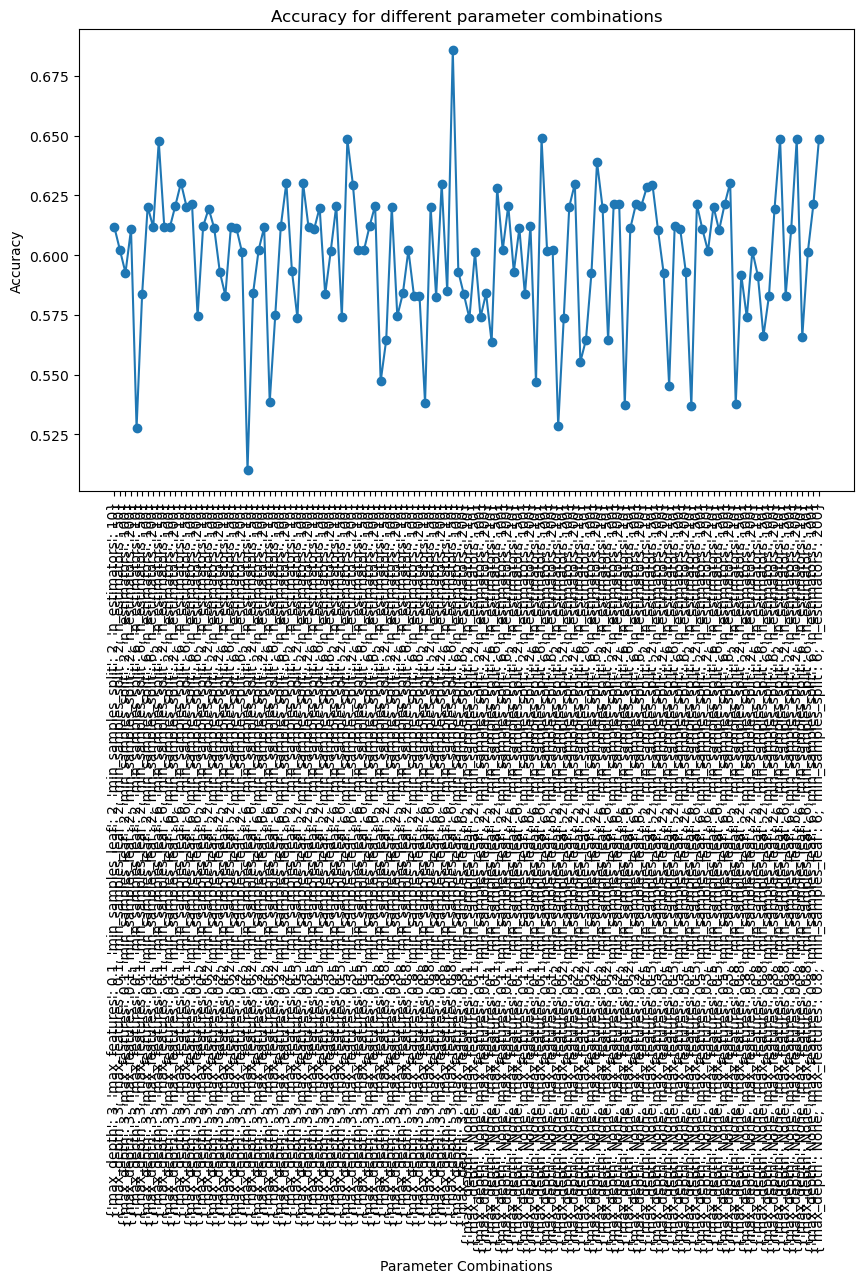

In [6]:
# import matplotlib.pyplot as plt

# # GridSearchCV 결과를 통해 정확도 그래프 생성
# results = gd.cv_results_
# mean_test_scores = results['mean_test_score']
# params = results['params']

# # 정확도를 저장할 리스트
# accuracies = []

# # 파라미터 조합 별로 정확도 추가
# for i in range(len(params)):
#     accuracies.append((params[i], mean_test_scores[i]))

# # 파라미터 조합을 문자열로 변환
# param_strings = [str(param) for param, acc in accuracies]

# # 그래프 생성
# plt.figure(figsize=(10, 6))
# plt.plot(range(len(accuracies)), [acc for param, acc in accuracies], marker='o')
# plt.xticks(range(len(param_strings)), param_strings, rotation=90)
# plt.xlabel('Parameter Combinations')
# plt.ylabel('Accuracy')
# plt.title('Accuracy for different parameter combinations')
# plt.tight_layout()
# plt.show()